# Import Libraries
<hr>

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss

# Load data from csv file

In [3]:
df = pd.read_csv("class_ml.csv")

<h1>Data Visualization and Analysis</h1>

In [4]:
df = df.astype(float)
df['output'] = df['output'].astype(int)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

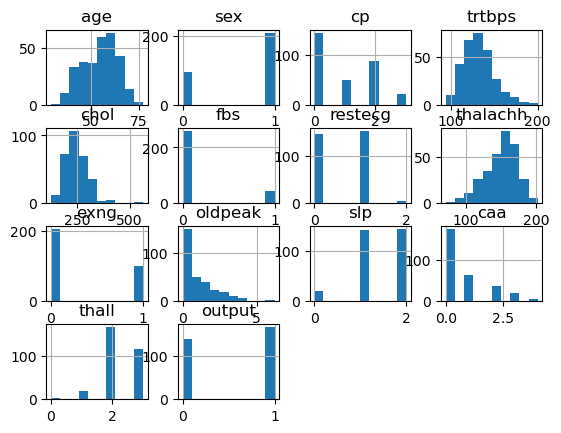

In [5]:
df.hist()

# Define feature sets

In [6]:
X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']].values
X[:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [7]:
Y = df['output'].values
Y[:5]

array([1, 1, 1, 1, 1])

# Normalizing our data

In [8]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

# Train & Test split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size = 0.18, random_state = 5)
print ("Train: ", x_train.shape, y_train.shape)
print ("Test: ", x_test.shape, y_test.shape)

Train:  (248, 13) (248,)
Test:  (55, 13) (55,)


<h1>Classification:</h1>
<br>
<h2>Logistic Regression</h2>


In [10]:
lr = LogisticRegression (C=0.01, solver='liblinear').fit(x_train, y_train)
lr

LogisticRegression(C=0.01, solver='liblinear')

# Prediction

In [11]:
yhat = lr.predict(x_test)
yhat

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

# Calculate the probability of each y

In [12]:
yprob = lr.predict_proba(x_test)
yprob

array([[0.31543983, 0.68456017],
       [0.82973004, 0.17026996],
       [0.83398188, 0.16601812],
       [0.64061133, 0.35938867],
       [0.37911384, 0.62088616],
       [0.74599773, 0.25400227],
       [0.39616579, 0.60383421],
       [0.83014548, 0.16985452],
       [0.24013488, 0.75986512],
       [0.38297893, 0.61702107],
       [0.39682357, 0.60317643],
       [0.86062897, 0.13937103],
       [0.30721909, 0.69278091],
       [0.22433994, 0.77566006],
       [0.652799  , 0.347201  ],
       [0.67663365, 0.32336635],
       [0.50700866, 0.49299134],
       [0.35543777, 0.64456223],
       [0.30882111, 0.69117889],
       [0.64917448, 0.35082552],
       [0.85705846, 0.14294154],
       [0.68918885, 0.31081115],
       [0.17598663, 0.82401337],
       [0.78450456, 0.21549544],
       [0.66663412, 0.33336588],
       [0.31313431, 0.68686569],
       [0.37483921, 0.62516079],
       [0.26295675, 0.73704325],
       [0.17230971, 0.82769029],
       [0.76284763, 0.23715237],
       [0.

# Evaluate base on jaccard_score

### In jaccard_score evaluation we cac get the percentage of our success!

in this model, 86.6% of situations the model is predictinc great without any kind of problem.

In [13]:
jaccard_score(y_test, yhat, pos_label=1)

0.8666666666666667

# Defining a function to plot confusion matrix

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[26  2]
 [ 2 25]]


## Use the plot_confusion_matrix function to plot a cnf base on our data

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        27
           1       0.93      0.93      0.93        28

    accuracy                           0.93        55
   macro avg       0.93      0.93      0.93        55
weighted avg       0.93      0.93      0.93        55

Confusion matrix, without normalization
[[26  2]
 [ 2 25]]


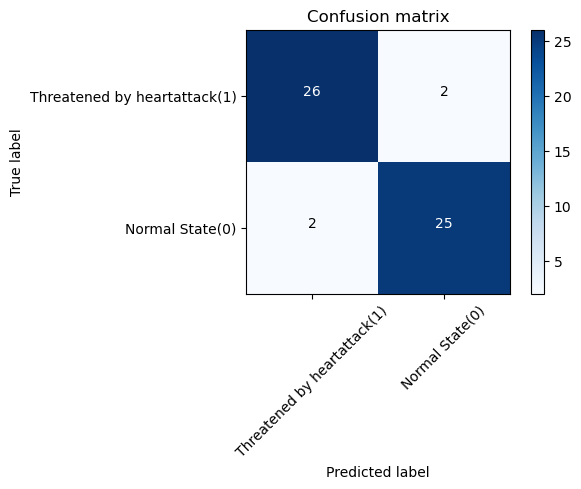

In [15]:

conf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)
print(classification_report(y_test,yhat))

plt.figure()
plot_confusion_matrix(conf_matrix, classes=["Threatened by heartattack(1)","Normal State(0)"],normalize= False,  title='Confusion matrix')

# Evaluate base on f1_score

In [16]:
f1_score(y_test,yhat, average='weighted')

0.9272727272727272

# Evaluate base on log loss!

### in Logistic Regression model I can calculate Y probability!

so log_loss evaluation can be used. The lower the log loss result, the better our model will be.

In [17]:
log_loss(y_test, yprob)

0.4087198063098078